# **1. Perkenalan**

**Nama:** Muhammad Aliansyah Ramadhan

**Kelas:** RMT - 035 

**Objective:**
Untuk pembuatan model ini, saya menggunakan sebuah dataset dari [Kaggle datasets](https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset/data)

Dataset ini berisi Kumpulan data persetujuan pinjaman adalah kumpulan catatan keuangan dan informasi terkait yang digunakan untuk menentukan kelayakan individu atau organisasi untuk memperoleh pinjaman dari lembaga pemberi pinjaman. Ini mencakup berbagai faktor seperti skor cibil, pendapatan, status pekerjaan, jangka waktu pinjaman, jumlah pinjaman, nilai aset, dan status pinjaman.

**SMART Framework: Loan Approval Prediction System**

 - Specific (Spesifik):
Membangun model machine learning untuk memprediksi apakah suatu pemohon pinjaman akan disetujui atau ditolak berdasarkan fitur-fitur seperti jumlah tanggungan, tingkat pendidikan, status pekerjaan, skor kredit, aset, dan pendapatan tahunan.

 - Measurable (Terukur):
Mengukur kinerja model menggunakan metrik evaluasi seperti akurasi, precision, recall, dan F1 Score. Targetnya adalah untuk mencapai minimal 80% F1 Score dalam memprediksi pinjaman yang disetujui (loan approval).

 - Achievable (Dapat Dicapai):
Menggunakan dataset pinjaman yang tersedia dengan alat seperti Python, scikit-learn, dan pustaka machine learning lainnya. Data sudah lengkap dengan fitur numerik dan kategorikal yang relevan, serta sumber daya (komputer dan pustaka) cukup memadai untuk melakukan analisis ini.

 - Relevant (Relevan):
Proyek ini relevan untuk membantu lembaga keuangan meningkatkan kecepatan dan akurasi dalam memutuskan persetujuan pinjaman. Model prediktif ini dapat membantu meminimalkan kesalahan keputusan dan memaksimalkan peluang pengambilan keputusan berbasis data.

 - Time-bound (Terikat Waktu):
Menyelesaikan proyek dalam waktu 1 bulan.

**Problem Statement:** 

Bagaimana cara membangun model machine learning yang dapat memprediksi persetujuan pinjaman dengan akurasi tinggi, menggunakan fitur-fitur seperti jumlah tanggungan, pendidikan, pekerjaan, skor kredit, dan nilai aset pemohon. Model ini harus mampu meminimalkan penolakan yang tidak akurat terhadap aplikasi pinjaman yang seharusnya disetujui, dengan mencapai setidaknya 80% f1 Score, dalam waktu 1 bulan pengembangan.

# **2. Import Libraries**

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Scikit-learn imports
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


from sklearn.metrics import classification_report,ConfusionMatrixDisplay,f1_score

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier

# save model
import pickle


# **3. Data Loading**

Pada bagian ini, saya akan load dataset menggunakan libraries pandas untuk selanjutnya dataset tersebut di gunakan untuk proses pembuatan machine learning. 

In [3]:
# load data
df_ori = pd.read_csv('loan_approval_dataset.csv')

Pada bagian ini, saya akan mengcopy dataset df_ori menjadi df, hal ini bertujuan untuk menjaga data asli (df_ori) tetap utuh dan tidak terpengaruh oleh perubahan yang di lakukan selama proses pengolahan data.

In [4]:
# copy data 
df = df_ori.copy()

Pada bagian ini, saya ingin mengetahui 5 kolom pertama yang ada pada dataset ini. 

In [5]:
# perlihatkan 5 baris pertama
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


Menurut 5 data di atas, saya tidak membutuhkan kolom loan_id. Hal ini di karenakan kolom ini hanya berisikan urutan dari masing masing baris data.

In [202]:
# drop kolom 1 dengan df.drop
df.drop(['loan_id'], axis = 1, inplace = True)
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


Pada bagian ini, saya ingin mencari apakah ada data yang duplikat, jika ada saya akan drop data tersebut karena data tersebut akan menggangu pada proses pembuatan model machine learning yang akan di lakukan. 

In [203]:
# melihat data duplikat
df.duplicated().sum()

0

Berdasarkan hasil pencarian di atas, tidak ditemukana data duplikat.

==============================================================

Pada bagian ini, saya ingin melihat type dari masing masing kolom yang ada pada dataset ini. Jika ada kolom yang bukan seharusnya, saya akan mengganti type kolom tersebut.

In [204]:
# melihat type data dari df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


Berdasarkan hasil dari pencarian di atas, kolom - kolom ini sudah memiliki type yang seharusnya mereka miliki. Juga, dataset ini berisi sebanyak 4269 data.
 

==============================================================

Pada bagian ini, saya ingin melihat sedikit mengenai statistik deskriptif dari dataset yang digunakan.

In [205]:
# perlihatkan sekilas data statistik nya
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


Dari hasil statistik deskriptif di atas, berikut adalah beberapa observasi yang dapat diambil:

- no_of_dependents:

Rata-rata jumlah tanggungan adalah sekitar 2.5, dengan standar deviasi sekitar 1.7.
Nilai minimal adalah 0 dan maksimal 5, yang menunjukkan variasi jumlah tanggungan dari tidak ada hingga 5 orang.

- income_annum (pendapatan tahunan):

Rata-rata pendapatan tahunan adalah sekitar 5 juta dengan standar deviasi sekitar 2.8 juta.
Rentangnya cukup besar, dari 200.000 hingga 9,9 juta, dengan median 5,1 juta.

- loan_amount (jumlah pinjaman):

Jumlah pinjaman rata-rata adalah sekitar 15,1 juta dengan standar deviasi sekitar 9 juta.
Jumlah minimal pinjaman adalah 300.000 dan maksimal 39,5 juta, menunjukkan adanya beberapa pinjaman yang sangat besar.

- loan_term (jangka waktu pinjaman):

Rata-rata jangka waktu pinjaman adalah 10,9 tahun, dengan standar deviasi sekitar 5,7 tahun.
Rentang jangka waktu adalah dari 2 hingga 20 tahun.

- cibil_score:

Rata-rata skor CIBIL adalah sekitar 600, dengan standar deviasi sekitar 172.
Rentang nilai dari 300 hingga 900, menunjukkan variasi skor kredit yang cukup lebar.

- residential_assets_value (nilai aset residensial):

Nilai rata-rata adalah sekitar 7,47 juta, tetapi ada aset residensial dengan nilai negatif (-100.000), yang mungkin merupakan kesalahan data atau menunjukkan nilai properti yang menurun.
Nilai maksimal adalah 29,1 juta, menunjukkan adanya properti yang sangat bernilai.

- commercial_assets_value (nilai aset komersial):

Nilai rata-rata aset komersial adalah sekitar 4,97 juta dengan standar deviasi sekitar 4,38 juta.
Nilai minimal 0 menunjukkan beberapa orang tidak memiliki aset komersial, sementara nilai maksimal mencapai 19,4 juta.

- luxury_assets_value (nilai aset mewah):

Rata-rata nilai aset mewah adalah 15,1 juta dengan standar deviasi sekitar 9,1 juta.
Aset mewah berkisar dari 300.000 hingga 39,2 juta.

- bank_asset_value (nilai aset di bank):

Rata-rata nilai aset bank adalah 4,97 juta dengan standar deviasi sekitar 3,25 juta.
Beberapa orang memiliki aset bank sebesar 0, sementara yang lain memiliki hingga 14,7 juta.



Berdasarkan hasil pengamatan, ditemukan beberapa nilai yang menarik perhatian adalah adanya nilai negatif pada kolom residential_assets_value dan kemungkinan outliers yang signifikan pada beberapa kolom. Ini mungkin memerlukan penanganan khusus, seperti winsorization atau analisis lebih lanjut untuk memastikan kualitas data.

==============================================================

Pada bagian ini, saya ingin cek apakah ada whitespace pada kolom kolom pada dataset.

In [206]:
# melihat nama nama kolom
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

berdasarkan hasil dari pencarian nama kolom menggunakan df.columns, ditemukan bahwa, semua kolom memiliki whitespace, saya akan tangani ini 

In [207]:
# menghapus whitespace yang ada di depan maupun di belakang
df.columns = df.columns.str.strip()

In [208]:
# perlihatkat kembali nama nama kolom
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

Semua kolom telah bersih dari whitespace.

==============================================================

Pada bagian ini, saya ingin cek nama nama values dari kolom yang bertipe string

In [209]:
# cek nilai yang ada pada kolom 'education'
df['education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [210]:
# cek nilai yang ada pada kolom 'self_employed'
df['self_employed'].unique()

array([' No', ' Yes'], dtype=object)

In [211]:
# cek nilai yang ada pada kolom 'loan_status'
df['loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

Berdasarkan hasil di atas, ditemukan whitespace di masing masing kolom yang bertipe string(object). Karena itu, saya akan menghapus whitespace tersebut menggunakan fungsi lambda.

In [212]:
# menghapus whitespace menggunakan lambda pada kolom object
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [213]:
# cek kembali kolom 'education'
df['education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [214]:
# cek kembali kolom 'self_employed'
df['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [215]:
# cek kembali kolom 'loan_status'
df['loan_status'].unique()

array(['Approved', 'Rejected'], dtype=object)

==============================================================

Membuat kolom baru untuk loan_status dalam bentuk numerik untuk digunakan pada proses EDA

In [216]:
# membuat kolom baru bernama loan_status_binary untuk di gunakan pada proses EDA
df['loan_status_binary'] = df['loan_status'].map({'Rejected': 0, 'Approved': 1})

# **4. Exploratory Data Analysis (EDA)**

## 4.1 Mencari Distribusi Semua kolom yang bertipe numerikal

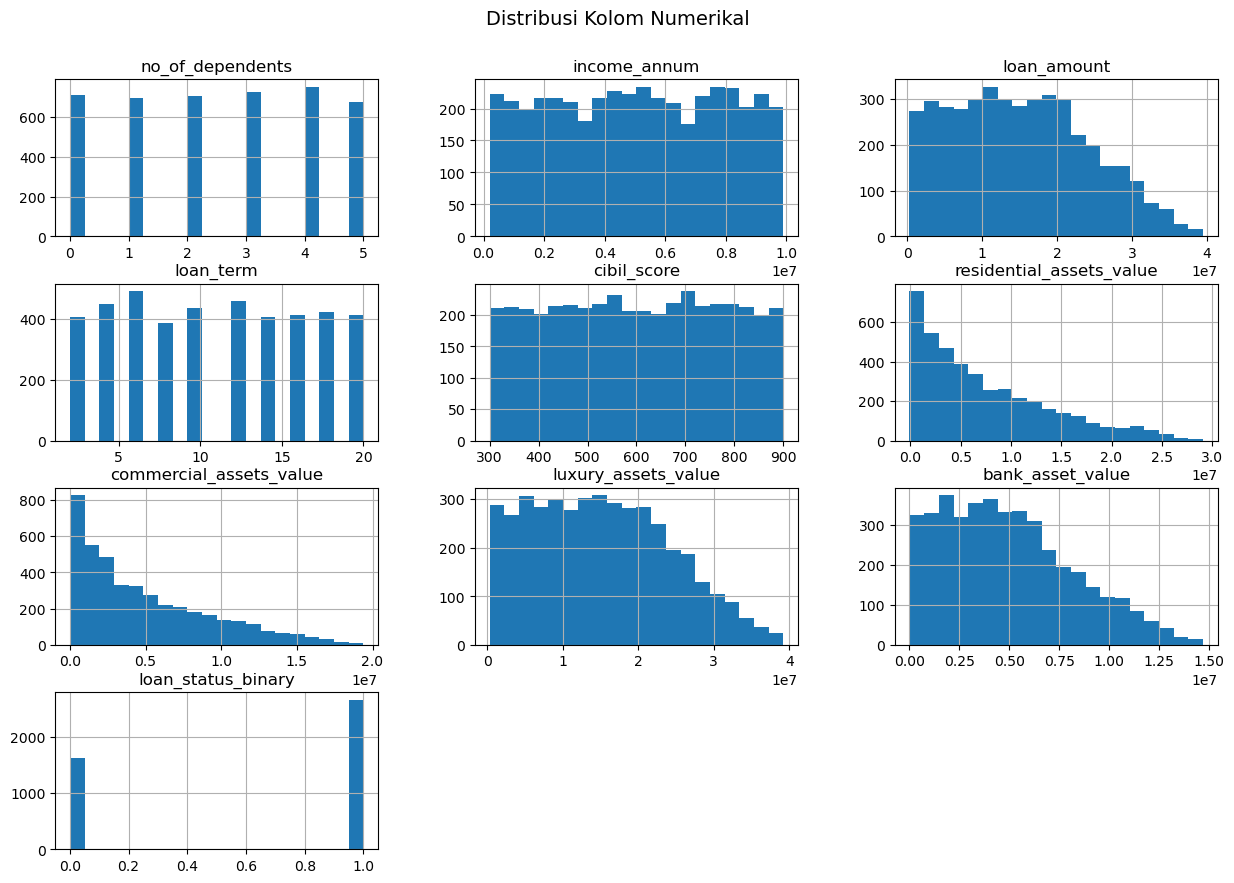

In [217]:
# Visualisasi distribusi kolom numerik
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribusi Kolom Numerikal", fontsize = 14, y = 0.95)
plt.show()

berdasarkan figur di atas:
pada kolom no_of_dependents (tanggungan) memiliki sebaran data yang hampir merata, hal ini juga terjadi pada kolom income_annum, loan_term (lamanya pinjaman) dan cibil_score(kredit skor).

Sedangkan untuk kolom loan_amount dan luxury_assets_value sebaran datanya lebih banyak ada di 0 - 2, sedangkan pada lebih dari 3 - 4 distribusi nya telah menurn, dapat di simpulkan bahwa orang orang cenderung meminjam tidak terlalu banyak dan hanya orang kaya saja yang meminjam lebih dari nilai 3 - 4  

selanjutnya pada kolom residential_assets_value terlihat skewness yang kemiringan yang tinggi, hal ini dapat menjadi indikator bahwa orang orang yang meminjam juga tidak terlalu kaya, hal ini pun di terjadi di commercial_assets_value dimana orang orang cenderung tidak memiliki harta komersil.


## 4.2 Visualisasi outliers dengan boxplot untuk semua kolom numerik

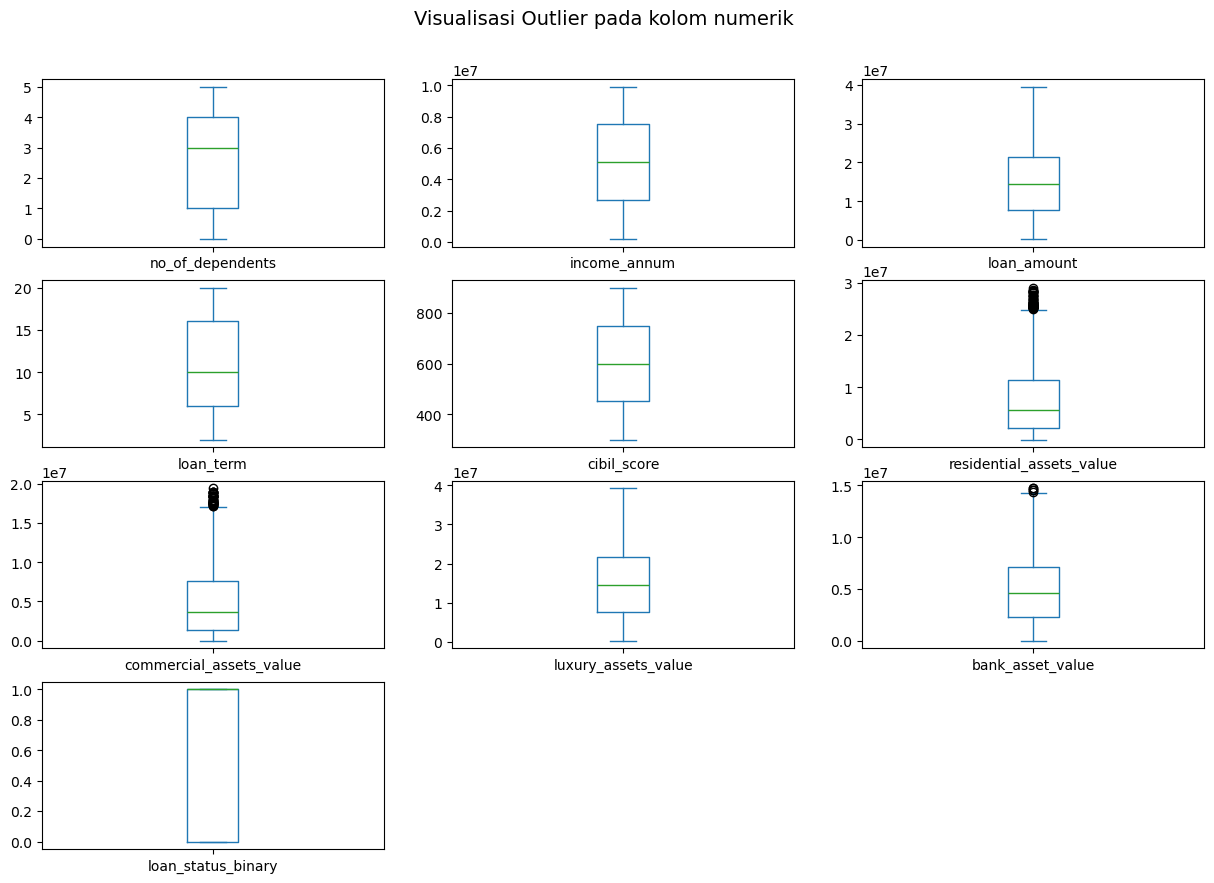

In [218]:
# melihat distribusi outlier menggunakan boxplot untuk semua kolom numerik
df.plot(kind='box', subplots=True, layout=(4, 3), figsize=(15, 10), sharex=False, sharey=False)
plt.suptitle("Visualisasi Outlier pada kolom numerik", fontsize = 14, y = 0.95)
plt.show()

terlihat pada figur di atas bahwa, mayoritas kolom tidak memiliki atau minim outlier, namun ada 3 kolom yang memilik outlier, yaitu residental_assets_value, commercial_assets_value dan bank_asset_value. 

Hal ini dapat di sebabkan oleh lebih banyaknya orang orang yang memiliki asset yang lebih rendah dari outlier.

## 4.3 Visualisasi frekuensi nilai kategorikal

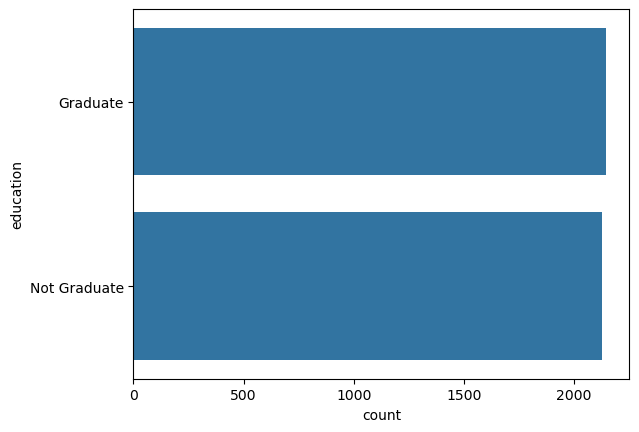

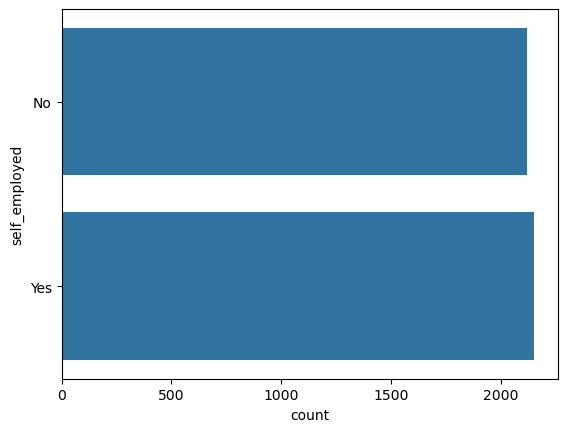

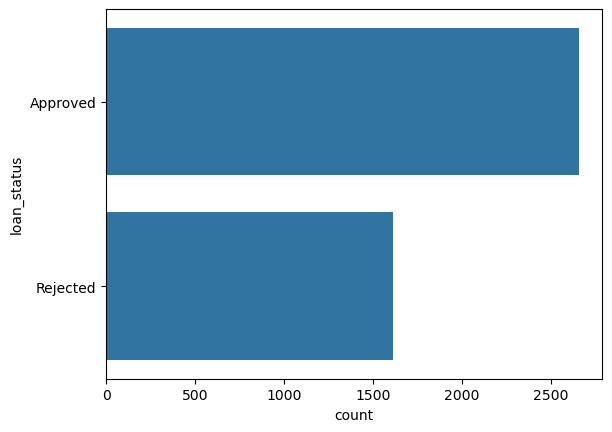

In [219]:
# melihat distribusi dari kolom kategorikal
for col in df.select_dtypes(include='object').columns:
    sns.countplot(y=col, data=df)
    plt.show()

Terlihat dari countplot di atas bahwa
Kolom education dan self_employed memiliki kemiripan distribusi data, sedangkan kolom loan_status, orang orang yang pinjamannya di setujui lebih banyak dari pada orang yang pinjamannya di tolak.

## 4.4 Membuat piechart untuk melihat distribusi loan_status

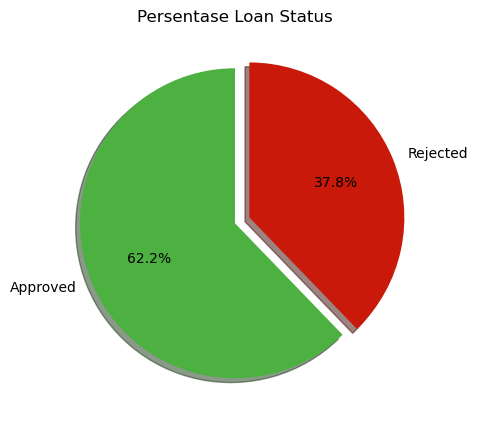

In [220]:
loan= df['loan_status'].value_counts()
plt.figure(figsize=(5,6))
plt.pie(loan, labels=loan.index, autopct='%1.1f%%', startangle=90, colors=['#4CB140', '#C9190B'], explode=(0, 0.1), shadow=True)
plt.title('Persentase Loan Status')
plt.show()

dapat di lihat pada piechart untuk persentase loan status, bahwa besar loan_status yang di approved adalah sebesar 62.2%, sedangkan yang di rejected adalah sebesar 37.8%

## 4.5 Membuat Heatmap Correlation

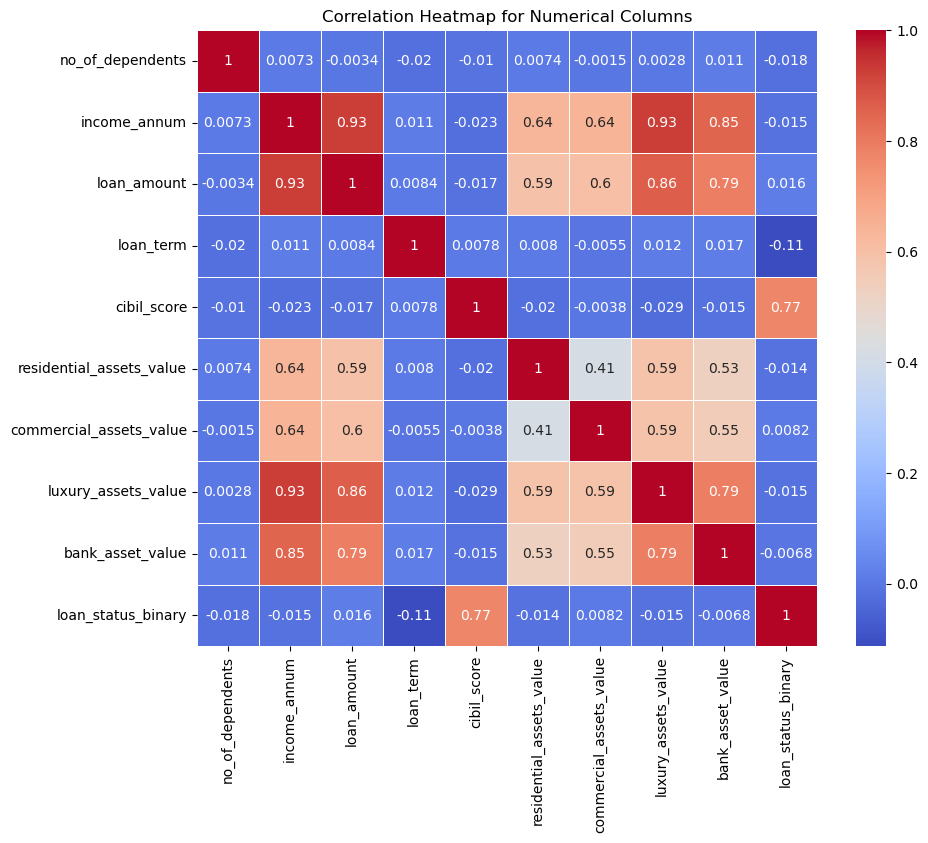

In [221]:
# Memilih hanya kolom numerik
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

# Membuat matriks korelasi
correlation_matrix = numerical_cols.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

Berdasarkan heatmap, kolom yang memiliki korelasi tinggi adalah cibil_score, dan sisanya memilki korelasi yang rendah, namun pada kasus ini, saya hanya menggunakan kolom yang memiliki nilai korelasi di atas -0.00 dan 0.00.

Dan juga karena cibil_score memiliki korelasi yang kuat, saya ingin melihat hubungan antara Jumlah Pinjaman dan Skor CIBIL berdasarkan Status Pinjaman

<Axes: xlabel='loan_amount', ylabel='cibil_score'>

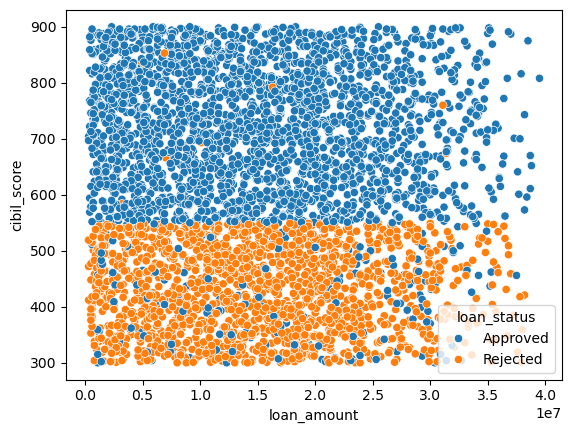

In [222]:
sns.scatterplot(x=df['loan_amount'], y=df['cibil_score'], hue=df['loan_status'])

terlihat pada scatterplot, jika cibil_score kurang dari 550, maka besar kemungkinan, loan_status nya akan di tolak. Dan sekilas mengenai cibil_score, CIBIL Score adalah sebuah indikator numerik yang menggambarkan kelayakan kredit individu atau entitas dalam mendapatkan pinjaman atau kredit dari lembaga keuangan di India. CIBIL, yang merupakan singkatan dari Credit Information Bureau (India) Limited, adalah salah satu lembaga pemeringkat kredit terkemuka di India

# **5. Feature Engineering**

## **5.1 Feature Selection**

Berdasarkan EDA, kolom yang akan saya gunakan selanjutnya adalah 

'no_of_dependents', 'education', 'self_employed', 'income_annum','loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value','luxury_assets_value', 'loan_status'. 

Hal ini di karenakan pada kolom commercial_assets_value, dan bank_asset_value memiliki korelasi yang sangat kurang, yaitu di bawah 0.00 dan -0.00

In [223]:
# perlihatkan nama nama kolom
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status', 'loan_status_binary'],
      dtype='object')

In [224]:
# mendefinisikan df_clean karena beberapa kolom tidak di gunakan.
df_clean = df.drop(['bank_asset_value', 'commercial_assets_value','loan_status_binary'], axis=1)

In [225]:
# tampilkan kembali nama - nama kolom
df_clean.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'luxury_assets_value', 'loan_status'],
      dtype='object')

## **5.2 Split Features (X) dan target (y)**

In [226]:
#Splitting antara X dan y
X = df_clean.drop(['loan_status'], axis = 1)
y = df_clean['loan_status']
X

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,luxury_assets_value
0,2,Graduate,No,9600000,29900000,12,778,2400000,22700000
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,8800000
2,3,Graduate,No,9100000,29700000,20,506,7100000,33300000
3,3,Graduate,No,8200000,30700000,8,467,18200000,23300000
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,29400000
...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,3300000
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,11000000
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,18100000
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,14100000


In [227]:
print("fitur:", X.shape)
print("target:", y.shape)

fitur: (4269, 9)
target: (4269,)


## **5.3 - Split train and test set**

In [228]:
# split antara test dan training data
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size= 0.2, random_state = 6)

In [229]:
# Tampilkan seberapa besar X_train dan X_test 
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (3415, 9)
Test Size (854, 9)


## **5.4 - Handling Outlier**

Merujuk kepada EDA 4.2, kolom residental_assets_value memiliki banyak outlier di atas upperbound. Saya tidak terlalu suka dengan outlier, karena outlier dapat membuat model kurang stabil, maka saya akan handle outlier agar model lebih clean.

In [230]:
# cek distribusi apakah skewed atau normal pada kolom - kolom yang telah di pilih
num_cols = ['no_of_dependents', 'income_annum','loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value','luxury_assets_value']

listItem= []

for col in num_cols:
  listItem.append([col, round(X_train[col].skew(),1), np.where(
    (round(X_train[col].skew(),1) <= 0.5) & (round(X_train[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])

skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness

,nama kolom,nilai skewness,distribution
0,no_of_dependents,-0.0,normal
1,income_annum,-0.0,normal
2,loan_amount,0.3,normal
3,loan_term,0.0,normal
4,cibil_score,-0.0,normal
5,residential_assets_value,1.0,skewed
6,luxury_assets_value,0.3,normal


In [231]:
# deteksi outlier menggunakan Inter Quartil Range (IQR)
def detect_outliers_iqr(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data < lower_bound) | (data > upper_bound)]
  return outliers

# deteksi outlier pada masing masing feature
for col in X_train.select_dtypes(include=np.number).columns:
  outliers = detect_outliers_iqr(X_train[col])
  print(f"Outliers in {col}:")
  print(outliers)

Outliers in no_of_dependents:
Series([], Name: no_of_dependents, dtype: int64)
Outliers in income_annum:
Series([], Name: income_annum, dtype: int64)
Outliers in loan_amount:
Series([], Name: loan_amount, dtype: int64)
Outliers in loan_term:
Series([], Name: loan_term, dtype: int64)
Outliers in cibil_score:
Series([], Name: cibil_score, dtype: int64)
Outliers in residential_assets_value:
3868    25500000
3498    25600000
228     25500000
905     28700000
3119    29100000
3234    28200000
3763    26100000
123     26800000
2384    26600000
4074    27300000
2586    28000000
1419    25500000
4042    27400000
1468    27000000
3880    26200000
2318    28500000
919     25300000
1965    28400000
892     27600000
1002    25800000
98      25900000
2922    25200000
2930    25300000
2818    25500000
1997    27000000
2927    27600000
924     25800000
3872    25400000
997     25200000
714     28300000
2828    26900000
82      25500000
3782    27500000
2412    26200000
987     28200000
3157    254000

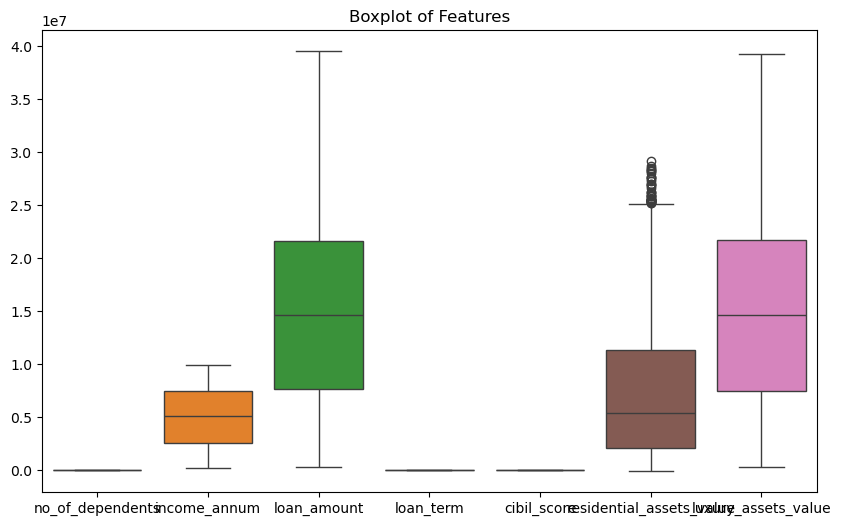

In [232]:
# deteksi outlier menggunakan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train.select_dtypes(include=np.number))
plt.title('Boxplot of Features')
plt.show()

Terlihat pada kolom residential_assets_value, ada banyak nilai outlier, maka saya akan handle kolom tersebut dengan capping.

In [233]:
# Capping outlier pada kolom 'residential_assets_value'
upper_limit = X_train['residential_assets_value'].quantile(0.95)
X_train['residential_assets_value'] = np.where(X_train['residential_assets_value'] > upper_limit, upper_limit, X_train['residential_assets_value'])
X_test['residential_assets_value'] = np.where(X_test['residential_assets_value'] > upper_limit, upper_limit, X_test['residential_assets_value'])

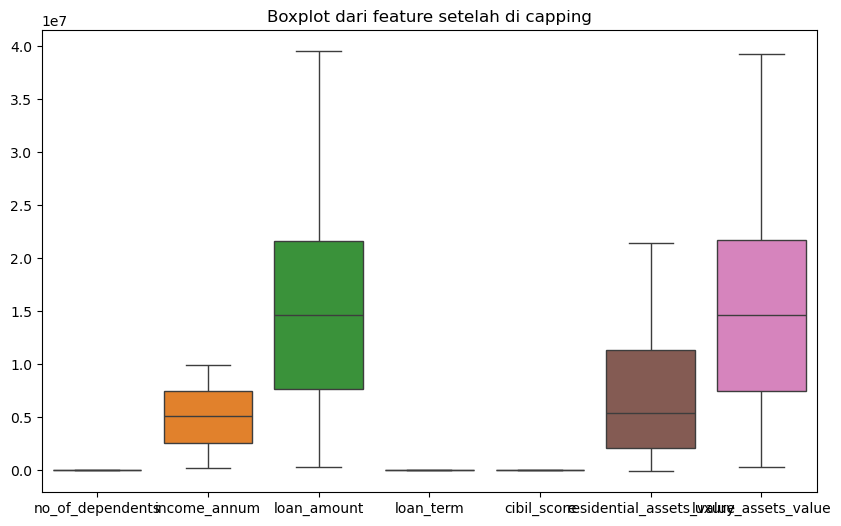

In [234]:
# menampilkan boxplot setelah di capping
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train.select_dtypes(include=np.number))
plt.title('Boxplot dari feature setelah di capping')
plt.show()

## **5.5 - Handling Missing Value**

Pada bagian ini, saya akan handle jikalau ada missing value pada dataset ini.

In [235]:
# cek missing value
X_train.isna().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
luxury_assets_value         0
dtype: int64

In [236]:
X_test.isna().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
luxury_assets_value         0
dtype: int64

In [237]:
y_train.isnull().sum()

0

In [238]:
y_test.isnull().sum()

0

Terlihat pada hasil pencarian di atas dari masing masing X_train, X_test, y_train, dan y_test, tidak di temukan adanya missing value, maka saya akan lanjutkan ke bagian selanjutnya.

## **5.6 - Split Categorical and Numerical**

pada bagian ini, saya akan memishkan kolom numerikal dan kolom kategorikal.

In [239]:
# pemisahan kolom secara manual berdasarkan EDA
numerical = ['no_of_dependents', 'income_annum','loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value','luxury_assets_value']
cat_nom = ['education', 'self_employed']

## **5.7 Pipeline Preproccessing**

pada bagian ini saya akan membuat pipeline preprocessing atau pembentukan alur kerja yang digunakan dalam persiapan data sebelum diterapkan ke model machine learning

In [240]:
# Pipeline untuk kolom numerik
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # walaupun tidak ada missing value pada dataset, imputer tetap di perlukan jikalau nantinya pada saat model ini digunakan (inference) ada missing value.
    ('scaler', StandardScaler()) # Normalisasi data 
])

# Pipeline untuk kolom kategorikal
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # walaupun tidak ada missing value pada dataset, imputer tetap di perlukan jikalau nantinya pada saat model ini digunakan (inference) ada missing value.
    ('encoder', OneHotEncoder(handle_unknown='ignore')) # Encoding dari bentuk object atau string menjadi sebuah array 
])

# Menggabungkan pipelines antara numerikal dan categorikal
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numerical),
    ('cat', categorical_pipeline, cat_nom)
])

# **6. Model Definition & Training**

Pada bagian ini, saya akan menggunakan beberapa model seperti KNN, SVM, Decision tree dan random forest, hal ini ditujukan agar saya dapat mengambil model terbaik.

## **6.1 KNeighbors**

pada bagian ini, saya akan menggunakan KNN yang terintegrasi dengan pipeline.

In [241]:
# Membuat pipeline dengan model KNN
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Melatih model dengan data training
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['no_of_dependents',
                                                   'income_annum',
                                                   'loan_amount', 'loan_term',
                                                   'cibil_score',
                                                   'residential_assets_value',
                                                   'luxury_assets_value']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['education',
                                                   'self_employed'])])),
                ('classifier', KNeighborsClassifier())])

## **6.2 Support Vector Machine**

pada bagian ini, saya akan menggunakan SVM yang terintegrasi dengan pipeline.

In [242]:
# Membuat pipeline dengan SVM
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True))
])

# Melatih model dengan data training
svm_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['no_of_dependents',
                                                   'income_annum',
                                                   'loan_amount', 'loan_term',
                                                   'cibil_score',
                                                   'residential_assets_value',
                                                   'luxury_assets_value']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['education',
                                                   'self_employed'])])),
                ('classifier', SVC(probability=True))])

## **6.3 Decision Tree**

pada bagian ini, saya akan menggunakan Decision Tree yang terintegrasi dengan pipeline.

In [243]:
# Membuat pipeline dengan model Decision Tree
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Melatih model dengan data training
decision_tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['no_of_dependents',
                                                   'income_annum',
                                                   'loan_amount', 'loan_term',
                                                   'cibil_score',
                                                   'residential_assets_value',
                                                   'luxury_assets_value']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['education',
                                                   'self_employed'])])),
                ('classifier', DecisionTreeClassifier())])

## **6.4 Random Forest**

pada bagian ini, saya akan menggunakan Random Forest  yang terintegrasi dengan pipeline.

In [244]:
# Membuat pipeline dengan model Random Forest
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100))
])

# Melatih model dengan data training
random_forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['no_of_dependents',
                                                   'income_annum',
                                                   'loan_amount', 'loan_term',
                                                   'cibil_score',
                                                   'residential_assets_value',
                                                   'luxury_assets_value']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['education',
                                                   'self_employed'])])),
                ('classifier', RandomForestClassifier())])

## **6.5 Catboost**

In [245]:
# Membuat pipeline dengan model CatBoost
catboost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(iterations=100, silent=True))
])

# Melatih model dengan data training
catboost_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['no_of_dependents',
                                                   'income_annum',
                                                   'loan_amount', 'loan_term',
                                                   'cibil_score',
                                                   'residential_assets_value',
                                                   'luxury_assets_value']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['education',
                                                   'self_employed'])])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x0000025F1BC255B0>)])

# **7. Model Evaluation**

Pada bagian ini, saya akan mencari model terbaik untuk selanjutnya saya gunakan dan saya tuning di bagian selanjutnya.

## 7.1 KNeighbors Evaluation

In [246]:
# Melakukan prediksi pada data train
y_pred_train_knn = knn_pipeline.predict(X_train)

# Menghitung F1 Score
f1_score_train = f1_score(y_train, y_pred_train_knn, average='weighted')

# Mencetak laporan klasifikasi
report_train = classification_report(y_train, y_pred_train_knn)

# Menampilkan hasil
print('F1 Score - Train Set:', f1_score_train)
print('Classification Report - Train Set:\n', report_train)


F1 Score - Train Set: 0.9448962600724875
Classification Report - Train Set:
               precision    recall  f1-score   support

    Approved       0.95      0.96      0.96      2135
    Rejected       0.93      0.92      0.93      1280

    accuracy                           0.94      3415
   macro avg       0.94      0.94      0.94      3415
weighted avg       0.94      0.94      0.94      3415



- Analisis Hasil
F1 Score - Train Set:

F1 Score: 0.9449

Model menunjukkan performa yang sangat baik di set pelatihan dengan F1 Score yang tinggi, mencerminkan keseimbangan yang baik antara precision dan recall. Ini berarti model sangat efisien dalam mengklasifikasikan kedua kelas, Approved dan Rejected.

- Classification Report - Train Set:

Model memiliki precision yang baik, yang berarti model jarang salah dalam mengklasifikasikan contoh sebagai positif. Recall yang tinggi menunjukkan bahwa model mampu menangkap sebagian besar contoh positif.
Rata-rata tertimbang dari semua metrik juga menunjukkan kinerja yang baik, dengan rata-rata F1 Score sebesar 0.94.

In [247]:
# Menggunakan cross validation untuk F1 Score
f1_train_cross_val_knn = cross_val_score(knn_pipeline,
                                           X_train,
                                           y_train,
                                           cv=3,
                                           scoring="f1_weighted")

print('F1 Score - All - Cross Validation (KNN): ', f1_train_cross_val_knn)
print('F1 Score - Mean - Cross Validation (KNN): ', f1_train_cross_val_knn.mean())
print('F1 Score - Std - Cross Validation (KNN): ', f1_train_cross_val_knn.std())
print('F1 Score - Range of Test-Set (KNN): ', 
      (f1_train_cross_val_knn.mean() - f1_train_cross_val_knn.std()), 
      '-', 
      (f1_train_cross_val_knn.mean() + f1_train_cross_val_knn.std()))


F1 Score - All - Cross Validation (KNN):  [0.88745891 0.89654411 0.88713294]
F1 Score - Mean - Cross Validation (KNN):  0.890378655500163
F1 Score - Std - Cross Validation (KNN):  0.00436166624768579
F1 Score - Range of Test-Set (KNN):  0.8860169892524773 - 0.8947403217478488


Hasil cross-validation menunjukkan konsistensi yang kurang baik karena penurunan sebanyak .08 menunjukan bahwa model mengalami overfitting.

F1 Score - Test Set   :  0.9133489461358314 

Classification Report (Focus on F1 Score): 
               precision    recall  f1-score   support

    Approved       0.93      0.93      0.93       521
    Rejected       0.89      0.89      0.89       333

    accuracy                           0.91       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.91      0.91      0.91       854
 



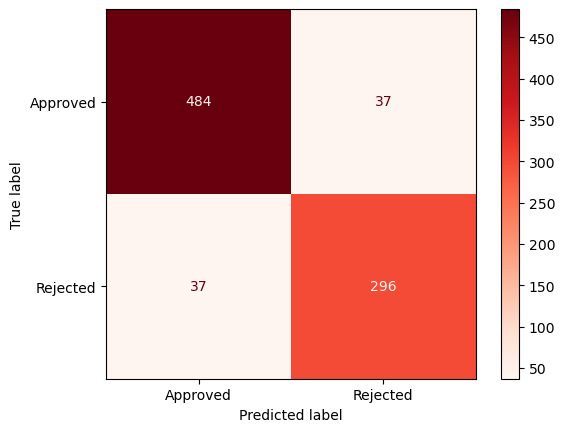

In [248]:
# Melakukan prediksi pada data test
y_pred_test_knn = knn_pipeline.predict(X_test)

# Menghitung F1 Score
f1_score_knn = f1_score(y_test, y_pred_test_knn, average='weighted')

# Mencetak hasil F1 Score
print('F1 Score - Test Set   : ', f1_score_knn, '\n')

# Mencetak laporan klasifikasi yang menekankan pada F1 Score
classification_report_knn = classification_report(y_test, y_pred_test_knn)
print('Classification Report (Focus on F1 Score): \n', classification_report_knn, '\n')

# Menampilkan Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn_pipeline, X_test, y_test, cmap='Reds')

secara keseluruhan model dapat digunakan dengan baik dengan overall f1 score = .91 pada data test. Meskipun ada sedikit perbedaan dalam precision dan recall antara kedua kelas, model berhasil menjaga keseimbangan yang baik dan mencapai F1 Score yang tinggi di kedua kelas.

## **7.2 Support Vector Machine Evaluation**

In [249]:
# Melakukan prediksi pada data train
y_pred_train_svm = svm_pipeline.predict(X_train)

# Menghitung F1 Score
f1_score_svm = f1_score(y_train, y_pred_train_svm, average='weighted')

# Mencetak laporan klasifikasi
report = classification_report(y_train, y_pred_train_svm)

# Menampilkan hasil
print('F1 Score - Train Set   : ', f1_score_svm, '\n')
print('Classification Report - Train Set:\n', report)

F1 Score - Train Set   :  0.9569512406815318 

Classification Report - Train Set:
               precision    recall  f1-score   support

    Approved       0.97      0.97      0.97      2135
    Rejected       0.94      0.94      0.94      1280

    accuracy                           0.96      3415
   macro avg       0.95      0.95      0.95      3415
weighted avg       0.96      0.96      0.96      3415



Model SVM menunjukan hasil yang baik pada train set yaitu f1 score 95

In [250]:
# Menggunakan cross validation
f1_train_cross_val_svm = cross_val_score(svm_pipeline,
                                          X_train,
                                          y_train,
                                          cv=3,
                                          scoring="f1_weighted")

print('F1 Score - All - Cross Validation (SVM): ', f1_train_cross_val_svm)
print('F1 Score - Mean - Cross Validation (SVM): ', f1_train_cross_val_svm.mean())
print('F1 Score - Std - Cross Validation (SVM): ', f1_train_cross_val_svm.std())
print('F1 Score - Range of Test-Set (SVM): ', 
      (f1_train_cross_val_svm.mean() - f1_train_cross_val_svm.std()), 
      '-', 
      (f1_train_cross_val_svm.mean() + f1_train_cross_val_svm.std()))


F1 Score - All - Cross Validation (SVM):  [0.94470123 0.93167245 0.94454655]
F1 Score - Mean - Cross Validation (SVM):  0.9403067453472836
F1 Score - Std - Cross Validation (SVM):  0.006105693603696705
F1 Score - Range of Test-Set (SVM):  0.9342010517435869 - 0.9464124389509804


setelah dilakukan crossval, model svm masih menunjukan hasil yang baik, walaupun ada pengurangan sebesar .01 dari sebelum di lakukan crossval, model ini masih memiliki nilai yang konsisten

F1 Score - Test Set   :  0.9508460065996632 

Classification Report : 
               precision    recall  f1-score   support

    Approved       0.96      0.96      0.96       521
    Rejected       0.93      0.94      0.94       333

    accuracy                           0.95       854
   macro avg       0.95      0.95      0.95       854
weighted avg       0.95      0.95      0.95       854
 



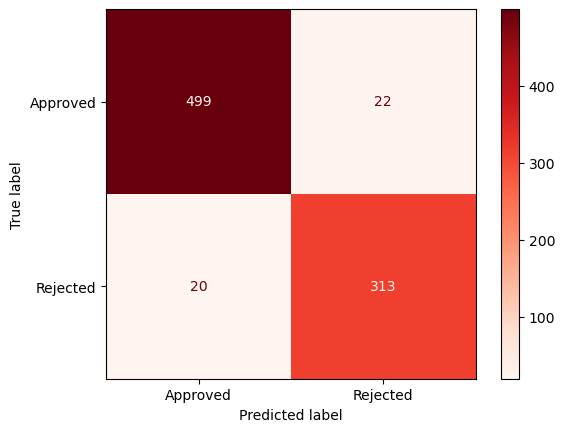

In [251]:
# Melakukan prediksi pada data test
y_pred_test_svm = svm_pipeline.predict(X_test)

# Menghitung F1 Score
f1_score_svm = f1_score(y_test, y_pred_test_svm, average='weighted')

# Mencetak laporan klasifikasi
classification_report_svm = classification_report(y_test, y_pred_test_svm)

# Menampilkan Confusion Matrix
ConfusionMatrixDisplay.from_estimator(svm_pipeline, X_test, y_test, cmap='Reds')

# Menampilkan hasil
print('F1 Score - Test Set   : ', f1_score_svm, '\n')
print('Classification Report : \n', classification_report_svm, '\n')


Setelah di lakukan model di coba menggunakan test set, hasil f1 score masih konsisten di angka .95, oleh karena itu, model dapat di katakan sangat baik menjaga konsistensi nya.

## **7.3 Decision Tree Evaluation**

In [252]:
# Melakukan prediksi pada data train
y_pred_train_dt = decision_tree_pipeline.predict(X_train)

# Menghitung F1 Score
f1_score_dt = f1_score(y_train, y_pred_train_dt, average='weighted')

# Mencetak laporan klasifikasi
classification_report_dt = classification_report(y_train, y_pred_train_dt)

# Menampilkan hasil
print('F1 Score - Train Set   : ', f1_score_dt, '\n')
print('Classification Report - Train Set:\n', classification_report_dt, '\n')


F1 Score - Train Set   :  1.0 

Classification Report - Train Set:
               precision    recall  f1-score   support

    Approved       1.00      1.00      1.00      2135
    Rejected       1.00      1.00      1.00      1280

    accuracy                           1.00      3415
   macro avg       1.00      1.00      1.00      3415
weighted avg       1.00      1.00      1.00      3415
 



terlihat bahwa, model decision tree memiliki akurasi 100% pada trainset atau tidak pernah salah, namun saya skeptis dengan nilai 100% itu

In [253]:
# Menggunakan cross-validation dengan scoring F1
f1_score_train_cross_val_dt = cross_val_score(decision_tree_pipeline,
                                               X_train,
                                               y_train,
                                               cv=3,
                                               scoring="f1_weighted")

# Menampilkan hasil
print('F1 Score - All - Cross Validation (dt): ', f1_score_train_cross_val_dt)
print('F1 Score - Mean - Cross Validation (dt): ', f1_score_train_cross_val_dt.mean())
print('F1 Score - Std - Cross Validation (dt): ', f1_score_train_cross_val_dt.std())
print('F1 Score - Range of Test-Set (dt): ', 
      (f1_score_train_cross_val_dt.mean() - f1_score_train_cross_val_dt.std()), 
      '-', 
      (f1_score_train_cross_val_dt.mean() + f1_score_train_cross_val_dt.std()))


F1 Score - All - Cross Validation (dt):  [0.95973889 0.97370901 0.97444824]
F1 Score - Mean - Cross Validation (dt):  0.9692987153982852
F1 Score - Std - Cross Validation (dt):  0.006766548661441641
F1 Score - Range of Test-Set (dt):  0.9625321667368435 - 0.9760652640597268


Hipotesis saya benar, setelah di lakukan cross validation, f1 score dari model langsung turun sebesar .95% hal ini dapat di karenakan overfitting model.

F1 Score - Test Set   :  0.9788993397673903 

Classification Report (Focus on F1 Score): 
               precision    recall  f1-score   support

    Approved       0.98      0.99      0.98       521
    Rejected       0.98      0.97      0.97       333

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854
 



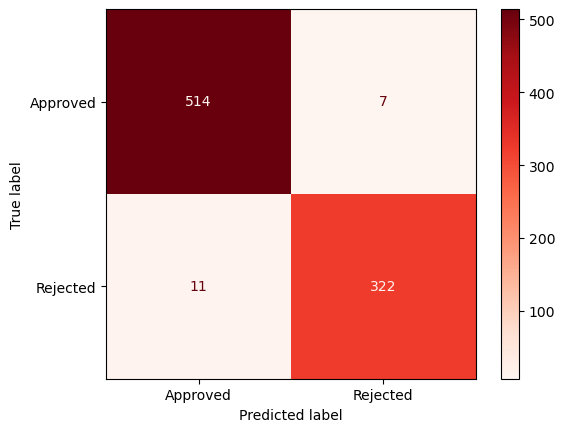

In [254]:
# Melakukan prediksi pada data test
y_pred_test_dt = decision_tree_pipeline.predict(X_test)

# Menghitung F1 Score
f1_score_dt = f1_score(y_test, y_pred_test_dt, average='weighted')

# Mencetak laporan klasifikasi yang berfokus pada F1 Score
classification_report_dt = classification_report(y_test, y_pred_test_dt)

# Menampilkan Confusion Matrix
ConfusionMatrixDisplay.from_estimator(decision_tree_pipeline, X_test, y_test, cmap='Reds')

# Menampilkan hasil
print('F1 Score - Test Set   : ', f1_score_dt, '\n')
print('Classification Report (Focus on F1 Score): \n', classification_report_dt, '\n')

hasil prediksi pada data test, terlihat bahwa, walaupun model overfit pada train set, f1 score pada test set menunjukkan f1 score sebesar 97%.

## **7.4 Random Forest Evaluation**

In [255]:
# Melakukan prediksi pada data train
y_pred_train_rf = random_forest_pipeline.predict(X_train)

# Menghitung F1 Score
f1_score_rf = f1_score(y_train, y_pred_train_rf, average='weighted')

# Mencetak laporan klasifikasi yang berfokus pada F1 Score
classification_report_rf = classification_report(y_train, y_pred_train_rf)

# Menampilkan hasil
print('F1 Score - Train Set   : ', f1_score_rf, '\n')
print('Classification Report (Focus on F1 Score): \n', classification_report_rf, '\n')


F1 Score - Train Set   :  1.0 

Classification Report (Focus on F1 Score): 
               precision    recall  f1-score   support

    Approved       1.00      1.00      1.00      2135
    Rejected       1.00      1.00      1.00      1280

    accuracy                           1.00      3415
   macro avg       1.00      1.00      1.00      3415
weighted avg       1.00      1.00      1.00      3415
 



Hal yang serupa terjadi pada model random forest, f1 score sebesar 100% yang bisa jadi menunjukkan ada nya overfit.

In [267]:
# menggunakan cross validation
f1_train_cross_val_rf = cross_val_score(random_forest_pipeline,
                                         X_train,
                                         y_train,
                                         cv=3,
                                         scoring="f1_weighted")

print('F1 Score - All - Cross Validation (Random Forest): ', f1_train_cross_val_rf)
print('F1 Score - Mean - Cross Validation (Random Forest): ', f1_train_cross_val_rf.mean())
print('F1 Score - Std - Cross Validation (Random Forest): ', f1_train_cross_val_rf.std())
print('F1 Score - Range of Test-Set (Random Forest): ', 
      (f1_train_cross_val_rf.mean() - f1_train_cross_val_rf.std()), 
      '-', 
      (f1_train_cross_val_rf.mean() + f1_train_cross_val_rf.std()))


F1 Score - All - Cross Validation (Random Forest):  [0.97106049 0.9824651  0.97613465]
F1 Score - Mean - Cross Validation (Random Forest):  0.9765534160769797
F1 Score - Std - Cross Validation (Random Forest):  0.004665319199568278
F1 Score - Range of Test-Set (Random Forest):  0.9718880968774114 - 0.9812187352765479


setelah di cek menggunakan cross val, nilai masih menunjukan angka yang sangat signifikan, 99% pada semua scoring, menunjukkan bahwa model ini, hingga saat ini, adalah model terbaik. 

F1 Score - Test Set   :  0.985916587772186 

Classification Report (Focus on F1 Score): 
               precision    recall  f1-score   support

    Approved       0.98      1.00      0.99       521
    Rejected       0.99      0.97      0.98       333

    accuracy                           0.99       854
   macro avg       0.99      0.98      0.99       854
weighted avg       0.99      0.99      0.99       854
 



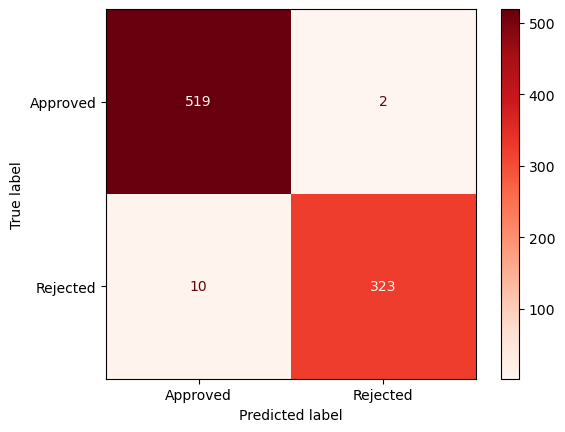

In [257]:
# Melakukan prediksi pada data test
y_pred_test_rf = random_forest_pipeline.predict(X_test)

# Menghitung F1 Score
f1_score_rf = f1_score(y_test, y_pred_test_rf, average='weighted')

# Mencetak laporan klasifikasi yang berfokus pada F1 Score
classification_report_rf = classification_report(y_test, y_pred_test_rf)

# Menampilkan Confusion Matrix
ConfusionMatrixDisplay.from_estimator(random_forest_pipeline, X_test, y_test, cmap='Reds')

# Menampilkan hasil
print('F1 Score - Test Set   : ', f1_score_rf, '\n')
print('Classification Report (Focus on F1 Score): \n', classification_report_rf, '\n')

hasil prediksi menggunakan data test menunjukan nilai yang relatif stabil antara train set dan test set, f1 score pada test set menunjukkan angka sebesar 98% dan dapat di pastikan bahwa model ini adalah model terbaik.

## **7.5 Catboost Evaluation**

In [258]:
# Melakukan prediksi pada data train
y_pred_train_catboost = catboost_pipeline.predict(X_train)

# Menghitung F1 Score
f1_score_train = f1_score(y_train, y_pred_train_catboost, average='weighted')

# Mencetak laporan klasifikasi
report_train = classification_report(y_train, y_pred_train_catboost)

# Menampilkan hasil untuk data train
print('F1 Score - Train Set:', f1_score_train)
print('Classification Report - Train Set:\n', report_train)


F1 Score - Train Set: 0.9938412890021412
Classification Report - Train Set:
               precision    recall  f1-score   support

    Approved       0.99      1.00      1.00      2135
    Rejected       1.00      0.98      0.99      1280

    accuracy                           0.99      3415
   macro avg       0.99      0.99      0.99      3415
weighted avg       0.99      0.99      0.99      3415



pada model catboost, nilai f1 score train set nya adalah angka 99% hal ini juga dapat di karenakan overfitting.

In [259]:
# Menggunakan cross-validation untuk menghitung F1 Score
f1_train_cross_val_catboost = cross_val_score(catboost_pipeline,
                                               X_train,
                                               y_train,
                                               cv=3,
                                               scoring="f1_weighted")

# Menampilkan hasil F1 Score cross-validation
print('F1 Score - All - Cross Validation (CatBoost): ', f1_train_cross_val_catboost)
print('F1 Score - Mean - Cross Validation (CatBoost): ', f1_train_cross_val_catboost.mean())
print('F1 Score - Std - Cross Validation (CatBoost): ', f1_train_cross_val_catboost.std())
print('F1 Score - Range of Test-Set (CatBoost): ', 
      (f1_train_cross_val_catboost.mean() - f1_train_cross_val_catboost.std()), 
      '-', 
      (f1_train_cross_val_catboost.mean() + f1_train_cross_val_catboost.std()))


F1 Score - All - Cross Validation (CatBoost):  [0.97625502 0.97892023 0.97614774]
F1 Score - Mean - Cross Validation (CatBoost):  0.9771076647444491
F1 Score - Std - Cross Validation (CatBoost):  0.0012824275246518468
F1 Score - Range of Test-Set (CatBoost):  0.9758252372197973 - 0.9783900922691009


setelah di lakukan crossvalidation, train set pada model catboost memiliki nilai f1 score sebanyak 97% (masih di bawah random forest)

F1 Score - Test Set   :  0.9800304986305904 

Classification Report (Focus on F1 Score): 
               precision    recall  f1-score   support

    Approved       0.97      0.99      0.98       521
    Rejected       0.99      0.96      0.97       333

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854
 



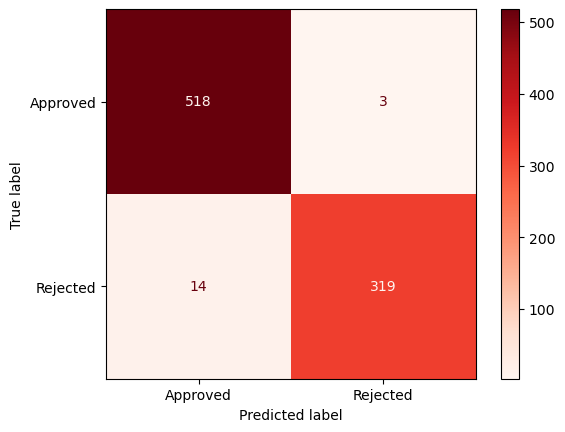

In [260]:
# Melakukan prediksi pada data test
y_pred_test_catboost = catboost_pipeline.predict(X_test)

# Menghitung F1 Score
f1_score_catboost = f1_score(y_test, y_pred_test_catboost, average='weighted')

# Mencetak laporan klasifikasi yang berfokus pada F1 Score
classification_report_catboost = classification_report(y_test, y_pred_test_catboost)

# Menampilkan Confusion Matrix
ConfusionMatrixDisplay.from_estimator(catboost_pipeline, X_test, y_test, cmap='Reds')

# Menampilkan hasil
print('F1 Score - Test Set   : ', f1_score_catboost, '\n')
print('Classification Report (Focus on F1 Score): \n', classification_report_catboost, '\n')


pada pengujian menggunakan test set, nilai dari model catboost adalah sebesar 98%

## **7.6 Model Analysis**

Berdasarkan hasil dari pengujian masing masing model di temukan bahwa

1. KNN 
    - Train set 
        F1 Score == 94%
    - Crossval
        F1 Score == 88%
    - Test set 
        F1 Score == 91%

2. SVM 
    - Train set 
        F1 Score == 95%
    - Crossval
        F1 Score == 94%
    - Test set 
        F1 Score == 95%

3. Decision Tree
    - Train set 
        F1 Score == 100%
    - Crossval
        F1 Score == 95%
    - Test set 
        F1 Score == 97%

4. Random Forest 
    - Train set 
        F1 Score == 100%
    - Crossval
        F1 Score == 99%
    - Test set 
        F1 Score == 98%

5. Catboost
    - Train set 
        F1 Score == 99%
    - Crossval
        F1 Score == 97%
    - Test set 
        F1 Score == 98%



Dalam analisis model ini, saya mengevaluasi kinerja lima algoritma machine learning dalam mengklasifikasikan status pinjaman. Hasil pengujian F1 Score memberikan gambaran yang jelas tentang efektivitas masing-masing model:

 - K-Nearest Neighbors (KNN) menunjukkan performa yang baik dengan F1 Score 94% pada Train Set, tetapi mengalami penurunan ke 88% pada Cross-validation, mengindikasikan potensi masalah generalisasi. Meskipun demikian, KNN mampu mencapai 91% pada Test Set, menunjukkan bahwa model ini masih bisa diandalkan dalam prediksi pinjaman yang disetujui.

 - Support Vector Machine (SVM) tampil konsisten dengan F1 Score 95% di Train Set dan 94% pada Cross-validation. Model ini berhasil mencapai 95% di Test Set, menegaskan bahwa SVM dapat menangani data dengan baik di berbagai kondisi, termasuk data yang tidak terlihat sebelumnya.

 - Decision Tree menunjukkan hasil luar biasa dengan F1 Score 100% pada Train Set, yang dapat mengindikasikan overfitting. Di Cross-validation, skor ini turun menjadi 95%, dan di Test Set, mencapai 97%. Meskipun model ini dapat mempelajari pola dengan sangat baik, diperlukan perhatian pada potensi overfitting.

 - Random Forest juga mencatat F1 Score 100% pada Train Set dan menurun sedikit ke 99% di Cross-validation. Dengan 98% di Test Set, Random Forest menunjukkan kinerja yang sangat stabil dan mampu menjaga akurasi saat diuji pada data baru, menjadikannya salah satu model yang paling dapat diandalkan.

 - CatBoost menunjukkan performa yang sangat baik dengan F1 Score 99% di Train Set, 97% pada Cross-validation, dan 98% di Test Set. Model ini mengindikasikan kemampuan untuk menangani kompleksitas data serta mengatasi masalah overfitting secara efektif.

## **7.7 Tuning**

Saya akan tuning model terbaik yaitu random forest menggunakan hyperparameter tuning gridsearch, hal ini di karenakan gridsearch memiliki akurasi yang lebih baik dari pada randomsearch. Hal ini dikarenakan pada randomsearch, setiap kali melakukan tuning, maka dapat di pastikan tuningannya dapat berbeda beda.

In [261]:
# mendefinisikan parameter yang akan di gunakan pada gridsearch
param_grid = {
    'classifier__n_estimators': [50, 100, 200],  
    'classifier__max_depth': [None, 10, 20, 30], 
    'classifier__min_samples_split': [2, 5, 10], 
    'classifier__min_samples_leaf': [1, 2, 4], 
    'classifier__max_features': [None, 'sqrt', 'log2'] 
}

In [262]:
# mendefinisikan gridsearch
grid_search = GridSearchCV(
    estimator=random_forest_pipeline,
    param_grid=param_grid,
    scoring='roc_auc',  
    cv=5,
    n_jobs=-1,
    verbose=2 
)

In [263]:
# kode untuk menggunakan gridsearch
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['no_of_dependents',
                                                                          'income_annum',
                                                                          'loan_amount',
                                                                          'loan_term',
                                                                          'cibil_score',
                                                                          'residential_assets_value',
                                                                          'luxury_assets_value']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(str...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['education',
                                                                          'self_employed'])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__max_features': [None, 'sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='roc_auc', verbose=2)

In [264]:
best_params = grid_search.best_params_ # mengambil parameter terbaik
best_score = grid_search.best_score_ # mengambil skor terbaik

print("Best Parameters:", best_params)
print("Best Cross-Validation Score (ROC AUC):", best_score)

Best Parameters: {'classifier__max_depth': 10, 'classifier__max_features': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best Cross-Validation Score (ROC AUC): 0.9978099385245903


In [268]:
# menggunakan parameter model terbaik berdasarkan gridsearch
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)

# mengkalkulasikan 
f1_score_test = f1_score(y_test, y_pred_test, average='weighted')

print("F1 Score - Test Set:", f1_score_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))


F1 Score - Test Set: 0.9823904974496747

Classification Report:
               precision    recall  f1-score   support

    Approved       0.98      0.99      0.99       521
    Rejected       0.99      0.96      0.98       333

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



# **8. Model Saving**

In [266]:
# save model ke file
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(grid_search.best_estimator_, model_file)

# **9. Model Inference**

Pada bagian ini, saya akan mencoba model yang telah di buat di [sini](P1M2_Aliansyahr_inf.ipynb)

# **10. Pengambilan Kesimpulan**

## **10.1 Conceptual Problems**

1. Bagging atau bootstrap aggregating adalah teknik ensemble yang meningkatkan stabilitsa model dengan mengurangi varian atau outlier.
cara kerja dari bagging adalah 
 - mengambil beberapa subset data dari dataset asli menggunakan bootstrap
 - membangun model secara independen pada setiap subset
 - menggabungkan prediksi dari semua model melalui klasifikasi atau regresi

2. Perbedaan Cara Kerja Random Forest dan CatBoost

- Random Forest:

    Metode: Menggunakan teknik bagging dengan banyak Decision Trees yang dilatih secara independen.
    Variabilitas: Mengurangi varians melalui voting dari prediksi model-model.
    Overfitting: Lebih tahan terhadap overfitting dibandingkan Decision Trees tunggal.

- CatBoost:

    Metode: Menggunakan teknik boosting, membangun model secara berurutan, di mana setiap model baru memperbaiki kesalahan dari model sebelumnya.
    Keterkaitan: Model-model saling terkait dan berfokus pada area sulit untuk diprediksi.
    Overfitting: Lebih rentan terhadap overfitting, tetapi memiliki mekanisme untuk mengurangi risiko ini.

3. Cross Validation adalah metode evaluasi model yang membagi dataset menjadi beberapa bagian, atau fold. Model dilatih pada sebagian data dan diuji pada bagian lainnya, kemudian diulang untuk setiap fold. Hasil evaluasi digabungkan untuk mengukur kinerja model secara keseluruhan, membantu menemukan overfitting, dan memastikan kemampuan generalisasi.

## **10.2 Kesimpulan**

1. EDA

    Sebaran Kolom: Kolom no_of_dependents, income_annum, loan_term, dan cibil_score memiliki sebaran yang hampir merata, sementara loan_amount dan luxury_assets_value terdistribusi mayoritas antara 0-2, dengan penurunan signifikan di atas 3-4, menunjukkan bahwa sebagian besar peminjam tidak meminjam banyak, kecuali orang kaya.

    Skewness: Residential_assets_value dan commercial_assets_value menunjukkan skewness tinggi, mengindikasikan peminjam cenderung tidak kaya.

    Outlier: Sebagian besar kolom minim outlier, kecuali residential_assets_value, commercial_assets_value, dan bank_asset_value yang memiliki outlier, mungkin karena banyak individu memiliki aset di bawah nilai outlier tersebut.

    Distribusi Countplot: Kolom education dan self_employed memiliki distribusi data yang mirip, sedangkan pada loan_status, lebih banyak pinjaman disetujui dibandingkan yang ditolak.

    Korelasi: Berdasarkan heatmap, cibil_score menunjukkan korelasi tinggi, sementara kolom lain rendah. Hanya kolom dengan nilai korelasi di atas -0.00 dan 0.00 yang dianalisis. Analisis lebih lanjut akan mengeksplorasi hubungan antara jumlah pinjaman dan skor CIBIL berdasarkan status pinjaman.

    Scatterplot: Jika cibil_score kurang dari 550, kemungkinan besar loan_status akan ditolak. CIBIL Score adalah indikator kelayakan kredit individu dalam mendapatkan pinjaman dari lembaga keuangan di India, di mana CIBIL merupakan lembaga pemeringkat kredit terkemuka.

2. Model Evaluation

    Secara keseluruhan, baik Random Forest maupun Decision Tree menunjukkan potensi yang sangat tinggi, tetapi Random Forest lebih mampu mempertahankan kinerjanya di berbagai set data. SVM dan CatBoost juga menunjukkan performa yang solid, sementara KNN sedikit kurang konsisten, terutama pada Cross-validation. Hal ini menunjukkan bahwa pemilihan model sangat penting dalam mencapai akurasi yang diinginkan dalam prediksi pinjaman yang disetujui.

3. Model Analysis

    Secara keseluruhan, Random Forest dan CatBoost muncul sebagai dua model yang paling efektif dalam analisis ini, dengan kemampuan untuk menjaga kinerja yang tinggi di berbagai set data. Sementara SVM menunjukkan konsistensi yang baik, KNN menunjukkan variasi dalam hasil, terutama saat diuji dengan data baru. Decision Tree, meskipun mampu memberikan hasil yang sangat baik, perlu diwaspadai terhadap risiko overfitting. Pemilihan model yang tepat akan sangat menentukan keberhasilan dalam memprediksi status pinjaman yang disetujui dan meminimalkan false negatives.